<a href="https://colab.research.google.com/github/boetjiemabafule/DATA-SCIENCE-PROJECT/blob/master/House_Prices_Predictionss(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "sample_submission.csv" with length 31939 bytes
User uploaded file "test.csv" with length 451405 bytes
User uploaded file "train.csv" with length 460676 bytes


In [0]:
#Loading and reading the datasets
salesTrain = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [0]:
salesTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#Checking dimesionality
salesTrain.shape


(1460, 81)

In [0]:
#Checking dimesionality
salesTrain.shape

(1460, 81)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5]),
 <a list of 19 Text major ticklabel objects>)

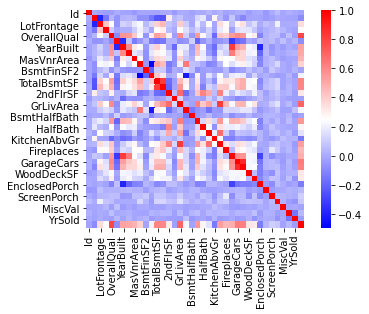

In [0]:
#Identifying the correlation
correlations = salesTrain.corr()
sns.heatmap(data = correlations,square = True , cmap ='bwr')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [0]:
#Checking for any missing values
salesTrain.isnull().sum().any()

True

In [0]:
#Checking for the total number of missing values
salesTrain.isnull().sum().sum()

6965

In [0]:
#Checking columns with the missing values
salesTrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [0]:
# *Handling missing values*

# Since the columns with missing data are not correlated with salePrice therefore we will drop them as they dont contribute to any useful insights


In [0]:
#Treating missing values
salesTrain_dropna = salesTrain.dropna(axis=1)

In [0]:
#Checking the missing values after dropping the columns with the missing values
salesTrain_dropna

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,49,1029,0,1078,GasA,Gd,Y,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,1,240,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [0]:
#Checking dimesionality after dropping columns with the missing values
salesTrain_dropna.shape

(1460, 62)

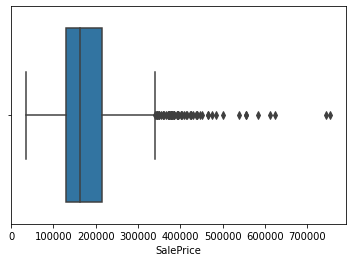

In [0]:
#Checking for Outliers

#Checking outliers
sns.boxplot(x=salesTrain['SalePrice'])

In [0]:
#Removing Outliers using IQR

In [0]:
#Implementation for quantiles

Q1=salesTrain['SalePrice'].quantile(0.25)
Q3=salesTrain['SalePrice'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

129975.0
214000.0
84025.0
3937.5 340037.5


In [0]:
#Apply conditions to remove outliers

salesTrain = salesTrain[salesTrain['SalePrice']< Upper_Whisker]

In [0]:
#Check shape of data after removing the outliers
salesTrain.shape

(1399, 81)

In [0]:
# Target Feature

#Sale Price

In [0]:
salesTrain ['SalePrice'].describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

In [0]:
# Our target feature is a continuous variable with values ranging from 34900 to 755000.
# The average sale price of all the houses in our dataset is 180921.

In [0]:
############## Visualize Discrete Features with their average Sale Price ################

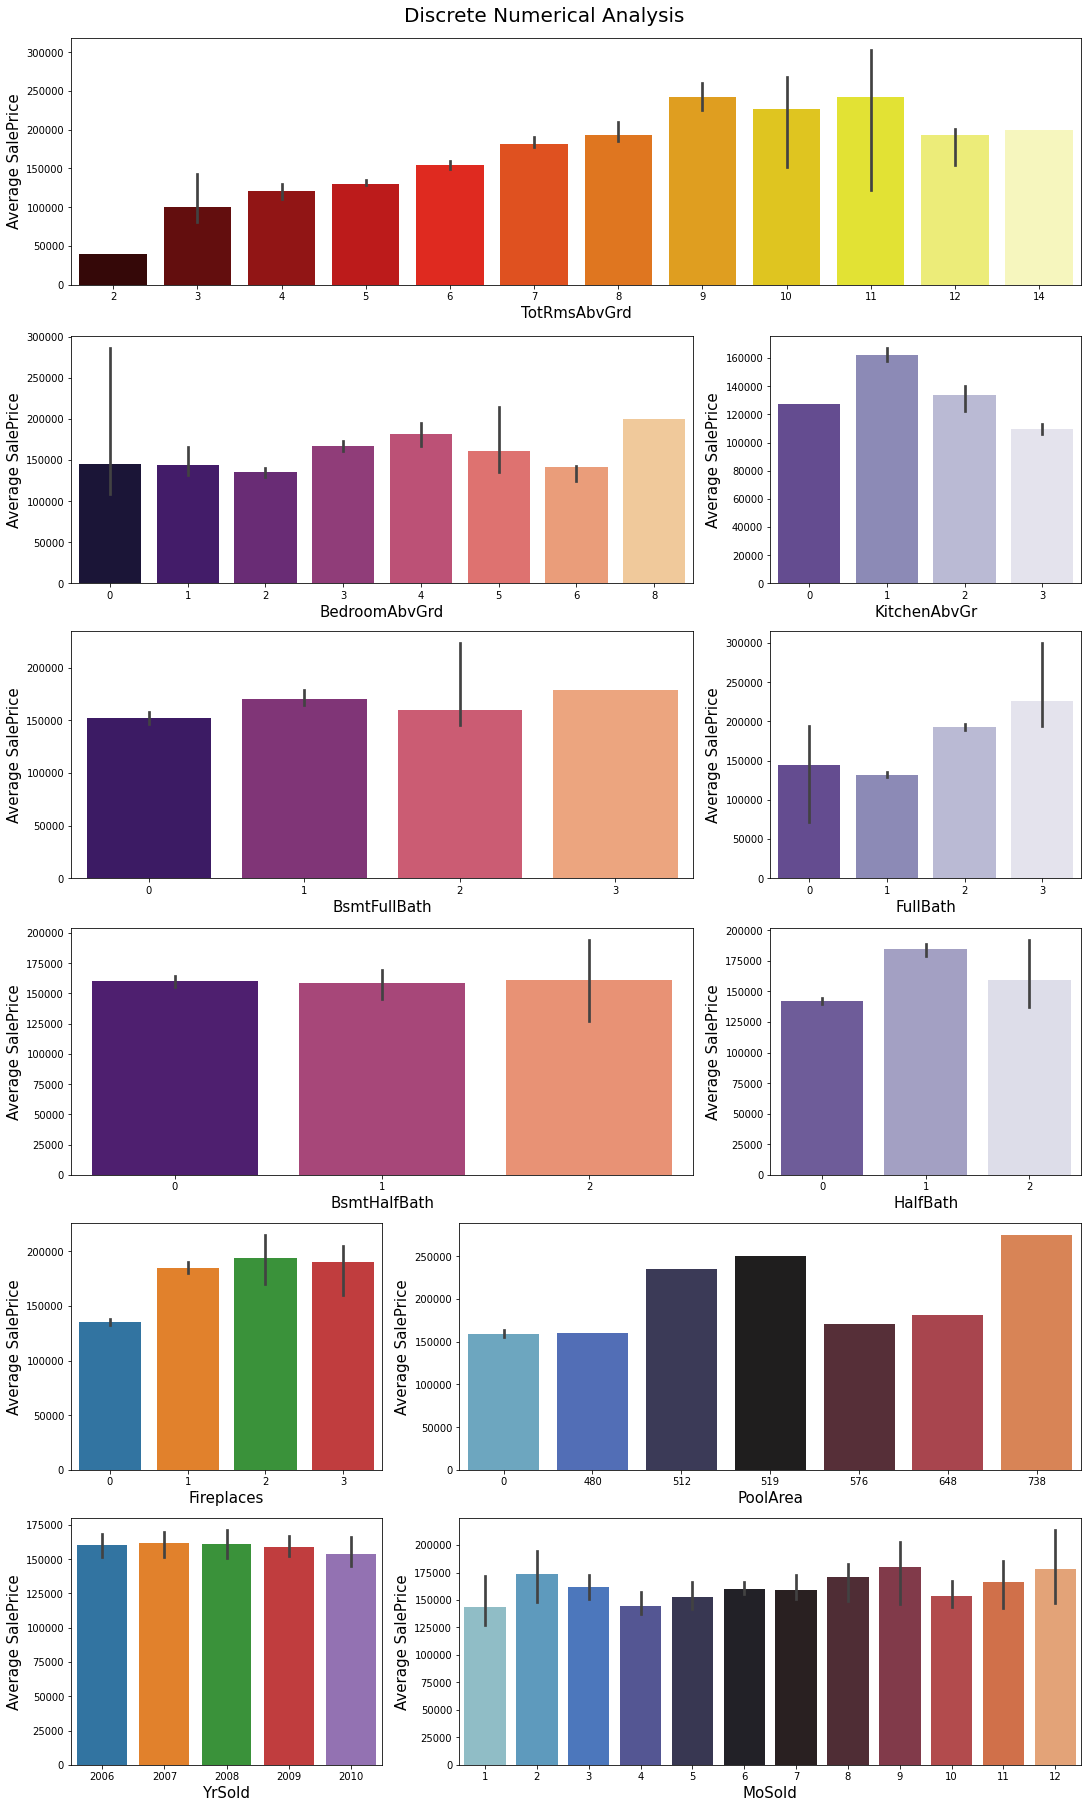

In [0]:
from numpy import median
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=salesTrain,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=salesTrain,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=salesTrain,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=salesTrain,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=salesTrain,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=salesTrain,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=salesTrain,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=salesTrain,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=salesTrain,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=salesTrain,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=salesTrain,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis",fontsize=20);

plt.show()

In [0]:
# Total Rooms Above Ground :- As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
# Bedroom Above Ground :- Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
# Kitchen Above ground :- Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
# InBasemnt Full bathroomsandBasement Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
# Now if we don't consider basement rooms,i.e Above grade Full Bathrooms and Half bathrooms .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.
# Fireplaces :- As fireplaces will increase in the house , sale price will also increase.
# PoolArea :- Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
# Year Sold :- The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.
# Month Sold :- There is not much to study about which month the house sold has higher or lower Sale Price

In [0]:
#  Now we can analyze the rest of the continuous numerical features

In [0]:
# We'll have a look at the correlation between all the features with the help of Heatmap.
# Heatmap will tell us which features are positively ,negatively and have no correlation with our target feature that we are trying to predict here .i.e Sale Price.
# As there are a lot of features , we'll take 10 features at a time for better visual analysis.

In [0]:
#First ten features

salesTrain_corr = salesTrain[num].iloc[:,0:10]
salesTrain_corr['SalePrice'] = salesTrain['SalePrice']
corr = salesTrain_corr.corr()

fig = plt.figure(figsize=(15,10))

#Here we use cmap CoolWarm as it gives us a better view of postive and negative correlation.
#And with the help of vmin and vmax set to -1 and +1 , the features having values closer to +1 have positive correlation and features having values closer to -1 have negative correlation.
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

NameError: ignored

In [0]:
# Among the first 10 numerical features,
# Above Ground Living Area sq ft is having a positive correlation of 0.71 with Sale Price which is obvious.
# Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
# We also expect LotArea to have a better correlation with Sale Price as increase in LotArea may also increase price of the house.
# We can see two features have negative correlation with SalePrice.
# BsmtFinSF2 [-0.011]
# LowQualFinSF [-0.026]

In [0]:
#Next features

salesTrain_corr = salesTrain[num].iloc[:,10:]
salesTrain_corr['SalePrice'] = salesTrain['SalePrice']
corr = salesTrain_corr.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

NameError: ignored

In [0]:
# In the next ten features , Garage Area has a positive correlation of 0.62 with Sale Price.
# FullBath is having a positive correlation of 0.56.
# TotRmsAbvGrd feature has a 0.53 correlation with SalePrice.

In [0]:
################## Categorical Analysis ################

In [0]:
# We will focus now on categorical variables in our dataset.
# As there are many categorical variables ,they will be grouped into categories
# And each feature will be explored with respect to Sale Price (target feature)


In [0]:
#Creating a list of all our categorical variables
cat=[]
for col in salesTrain.columns:
    if salesTrain[col].dtype=='object':
        cat.append(col)
        
#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [0]:
############## Category 1 :: Type of dwellings ##############

In [0]:
cat1 = ['MSSubClass']

In [0]:
# MSSubClass: Identifies the type of dwelling(parts for sale by the owner) involved in the sale.

In [0]:
#Converting integer values of MSSubClass to their respective categorical values given in description.
#Create a copy of the dataset and replace all numeric values with their respective categories.

salesTrain_new =salesTrain.copy()

salesTrain_new['MSSubClass'] = salesTrain_new['MSSubClass'].replace({20:'1_STORY_NEWER',
                                                    30:'1_STORY_OLDER',40:'1_STORY_ATTIC',
                                                    45:'1_1/2_UNFINISHED',
                                                    50:'1_1/2_FINISHED',60:'2_STORY_NEWER',
                                                    70:'2_STORY_OLDER',75:'2_1/2_STOPY',
                                                    80:'SPLIT/MULTILEVEL',85:'SPLIT_FOYER',
                                                    90:'DUPLEX',120:'1_STORY_PUD',
                                                    150:'1_1/2_STORY_PUD',
                                                    160:'2_STORY_PUD',
                                                    180:'PUD_MULTILEVEL',
                                                    190:'2_FAMILY_CONVERSION'})

#Covert to object
salesTrain_new['MSSubClass'] = salesTrain_new['MSSubClass'].astype(object)

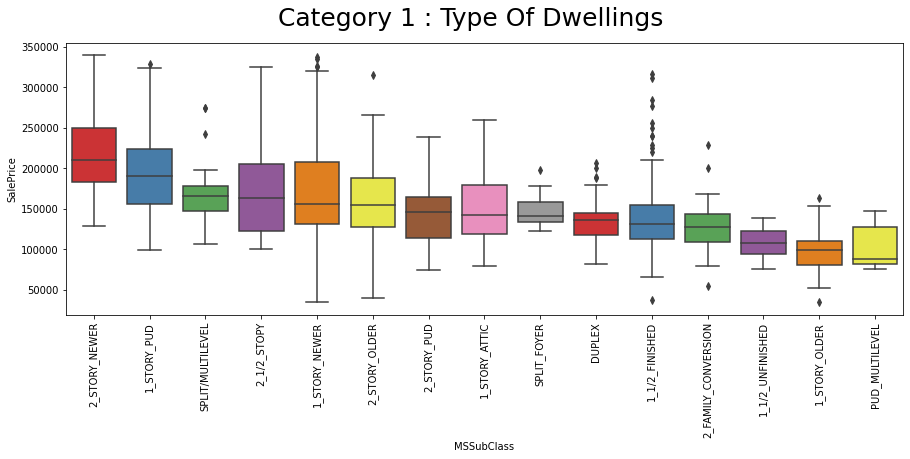

In [0]:
fig=plt.figure(figsize=(15,5))

table = salesTrain_new.groupby(['MSSubClass'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
ax = sns.boxplot(data=salesTrain_new,x="MSSubClass",y="SalePrice",order=table['MSSubClass'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
fig.suptitle("Category 1 : Type Of Dwellings",fontsize=25);

In [0]:
# Note:- The boxplots of all the features are plotted in descending order with respect to their median Sale price.

In [0]:
# The features to the left have higher sale price than and the features to the left lower sale price.

In [0]:
#******* In MSSubClass , The Newer 2-STORY and 1-Story PUDs have on average higher sale price than the others.******#

In [0]:
#**** There are outliers present in newer sub classes and the one's on the left. ****#

In [0]:
#****** We can also see there is some non-uniformity in the sub classes by looking at the size of the boxplot. ****#

In [0]:
#This table tells us the count of the above feature in the dataset and calculates average Sale price.
table = salesTrain_new.groupby(['MSSubClass'])['MSSubClass','SalePrice'].agg({"MSSubClass":"count","SalePrice":"median"})
table = table.sort_values(by="SalePrice",ascending=False)
table.style.background_gradient(cmap="Reds")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,MSSubClass,SalePrice
MSSubClass,,
2_STORY_NEWER,274,211000
1_STORY_PUD,85,191000
SPLIT/MULTILEVEL,57,165500
2_1/2_STOPY,15,163000
1_STORY_NEWER,507,156000
2_STORY_OLDER,59,155000
2_STORY_PUD,63,146000
1_STORY_ATTIC,4,142500
SPLIT_FOYER,20,140750


In [0]:
# The box plot showed us 2 story newer and 1 story pud had higher average price.
# But most of the data is for 1 story newer class and its average price is less than 160000.
# We can expect some non uniformity in the data.
# But overall , MSSubClass is a good feature for predicting Sale Price.

In [0]:
################ Category 2 :: Structure of Land and Property  ##################

In [0]:
cat2=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope']

In [0]:
# MSZoning: Identifies the general zoning classification of the sale.
#**Zoning allows local governments to regulate which areas under their jurisdiction may have real estate or land used for particular purposes ***

In [0]:
# Street: Type of road access to property
# LotShape: General shape of property
# LandContour: Flatness of the property
# LotConfig: Lot configuration
# LandSlope: Slope of property

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


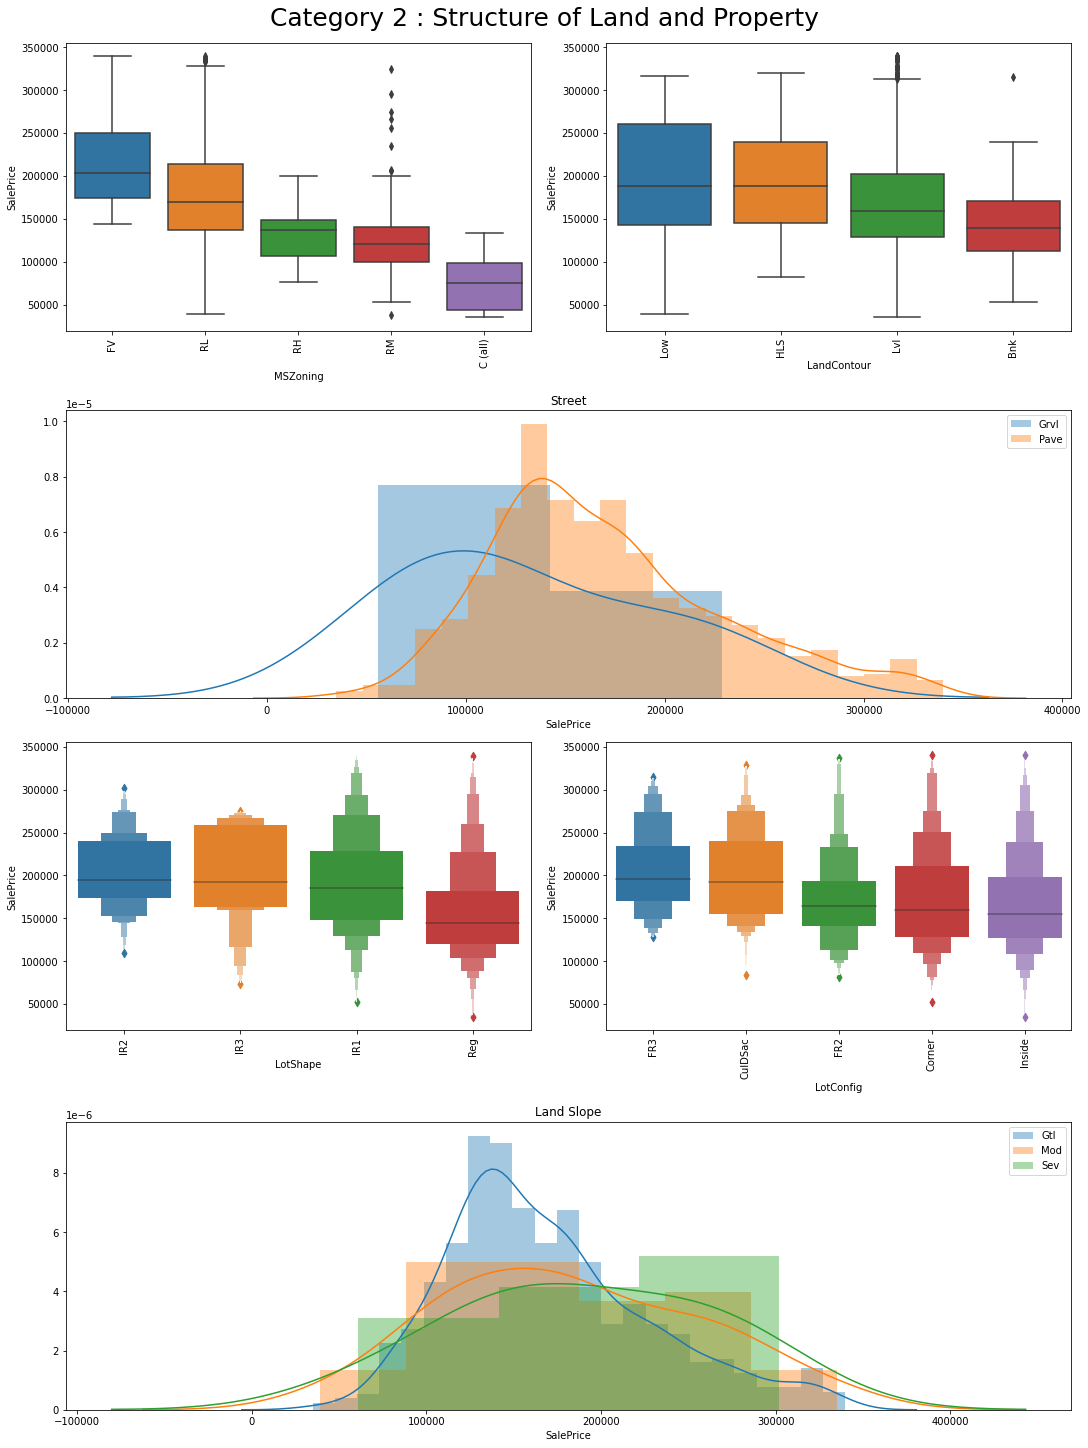

In [0]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[0,0])
table =salesTrain.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = salesTrain.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:])
a1 = sns.distplot(salesTrain[salesTrain['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(salesTrain[salesTrain['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

plt.subplot(gs[2,0])
table = salesTrain.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = salesTrain.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
a1 = sns.distplot(salesTrain[salesTrain['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(salesTrain[salesTrain['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(salesTrain[salesTrain['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")

fig.suptitle("Category 2 : Structure of Land and Property",fontsize=25);

In [0]:
# MSZoning:- Floating Village Residential zone (FV) is having higher Sale Price of around 2 lakhs.While Commercial zones are having the lowest Sale Price.And we see a variation in Sale Price in different zones which makes it an important feature for our prediction.
# LandContour:- If the house has significant slope on both sides (HLS) or is nearly flat(Low), Sale Price is more.For Depressed and Banked slopes , Sale price falls down
# LandContour:- If the house has significant slope on both sides (HLS) or is nearly flat(Low), Sale Price is more.For Depressed and Banked slopes , Sale price falls down
# LotShape :- We can see that houses with regular shapes have low price.And as the irregularity increases , the average sale price of the house also increases.
# LotConfig :- The configuration of the lot does not appear to vary the price sginificantly.The properties with Cul de Sac(street or passage closed at one end) and FR3(Frontage on 3 sides of property) configuration on average are having high value than the other configurations.
# LandSlope :- Most of the properties are having gentle slope and are lowest priced , while properties having moderate or severe slope have higher value.

In [0]:
################# Category 3 :: Overall Quality and Condition ################

In [0]:
cat2=['OverallQual','OverallCond']

In [0]:
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house

In [0]:
# Changing Overall quality and condition's values to categorical values
#OverallQual: Rates the overall material and finish of the house
   
salesTrain_new['OverallQual'] = salesTrain_new['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
salesTrain_new['OverallQual'] = salesTrain_new['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

salesTrain_new['OverallCond'] = salesTrain_new['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
salesTrain_new['OverallCond'] = salesTrain_new['OverallCond'].astype(object)

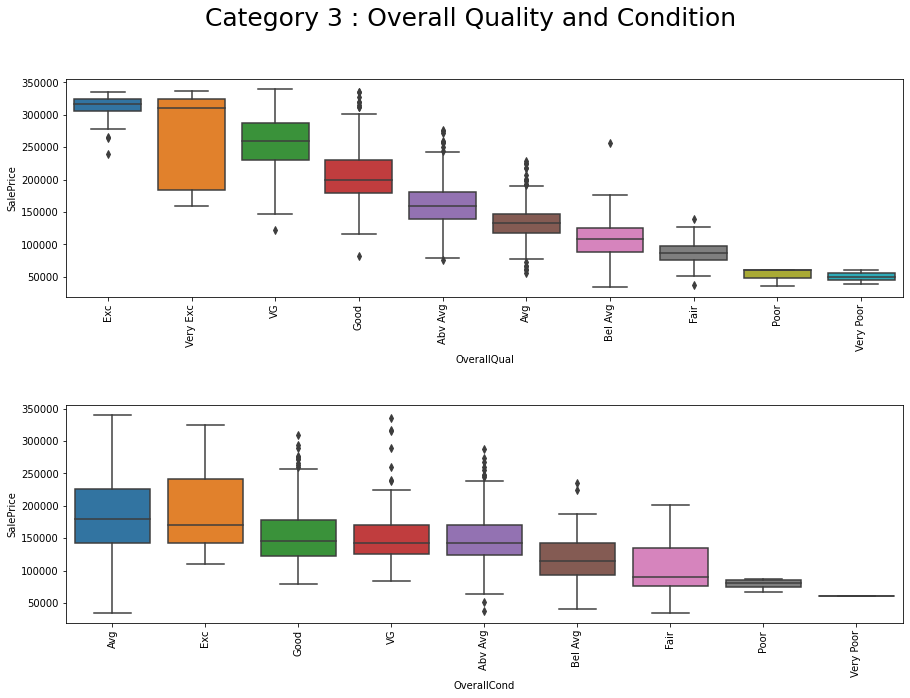

In [0]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = salesTrain_new.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain_new,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = salesTrain_new.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain_new,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Category 3 : Overall Quality and Condition",fontsize=25);

In [0]:
# Overall Quality :- It's obvious that if overall quality of the property is good , the Price will be high and we can clearly see that in the above box plot.This tells us that Overall Quality is an important feature in predicting Sale Price of the house.The below distribution gives us a better look of the variation in price with the overall quality.
# Overall Condition :- Most of the houses are in average condition and very few are in excellent condition as seen in the box plot and the below distribution.Properties in average and excellent condition are having average price high and the properties in very bad condition will have low sale price.

In [0]:
############################## Category 4 :: Location and Style ################

In [0]:
cat2=['Neighborhood','Condition1', 'Condition2','Utilities','BldgType', 'HouseStyle']


In [0]:
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)
# Utilities: Type of utilities available
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling


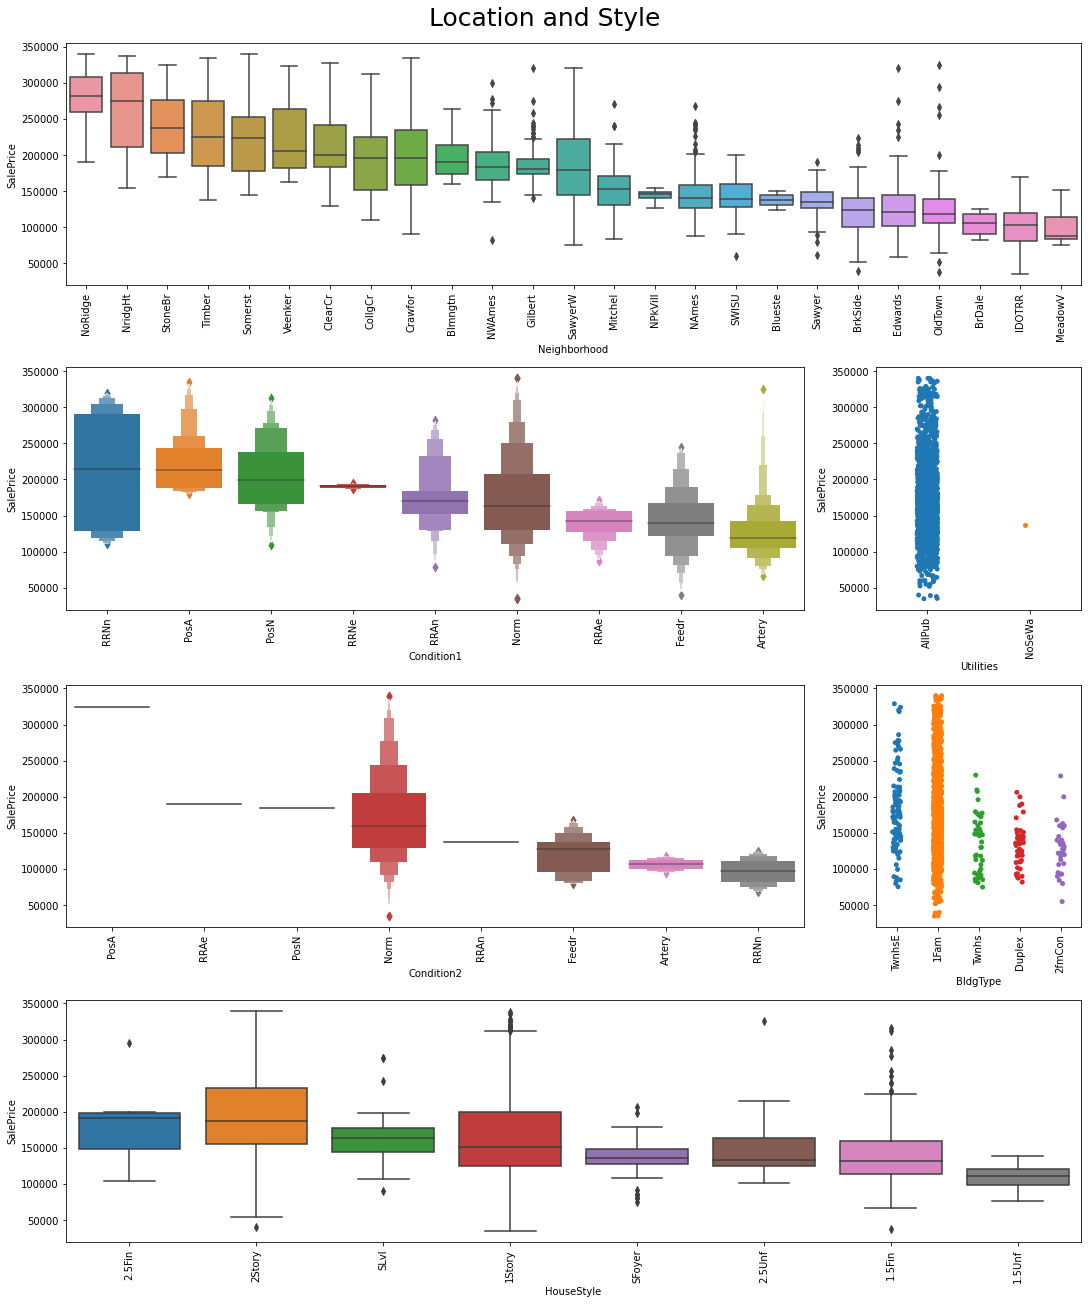

In [0]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = salesTrain.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = salesTrain.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = salesTrain.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=salesTrain,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = salesTrain.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = salesTrain.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=salesTrain,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = salesTrain.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data= salesTrain,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

In [0]:
# Building Type :- Single family detached dwellings have higher sale price compared to duplex,two family houses and townhouse dwellings
# Condition 1 and 2 :- In Condition 1 and 2 , close proximity to conditions like streets lowers the sale price and to railroads ,price is high.
# House Styles :- 2 Story and 1 Story finished house styles have highest sale price than unfinished properties which is obvious.
# Neighborhood :- We can see variation in sale price in different neighborhoods.From Mitchell neighborhoods , all the neighbors to the right are having consistently low price.
# The below table gives us a proper view of the neighborhoods and their average sale price

In [0]:
table = salesTrain_new.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,Neighborhood,SalePrice
15,NoRidge,282500
16,NridgHt,274450
22,StoneBr,237750
23,Timber,224500
21,Somerst,223500
24,Veenker,206000
4,ClearCr,200250
5,CollgCr,195950
6,Crawfor,195550
0,Blmngtn,191000


In [0]:
# After Mitchel , all the neighbors are having sale price less than 1,40,000.
# And the least price for MeadowV neighborhood.
# Utilities :- There are four utilities given in the description of this dataset.But we can only two utilities are available in our dataset .
# 1) All Public utilities and 2) Electricity and Gas only
# Out of 1460 data , only one house is having Electricity and gas utility in our dataset with Sale Price 137500.
# Most of the properties with all public utilities have sale price between 1lakh to 2lakh.


In [0]:
##################### Category 5 :: Roofing,Foundation and housing exterior ################

In [0]:
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type (Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick)
# Foundation: Type of foundation

In [0]:
cat3=['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'Foundation']

NameError: ignored

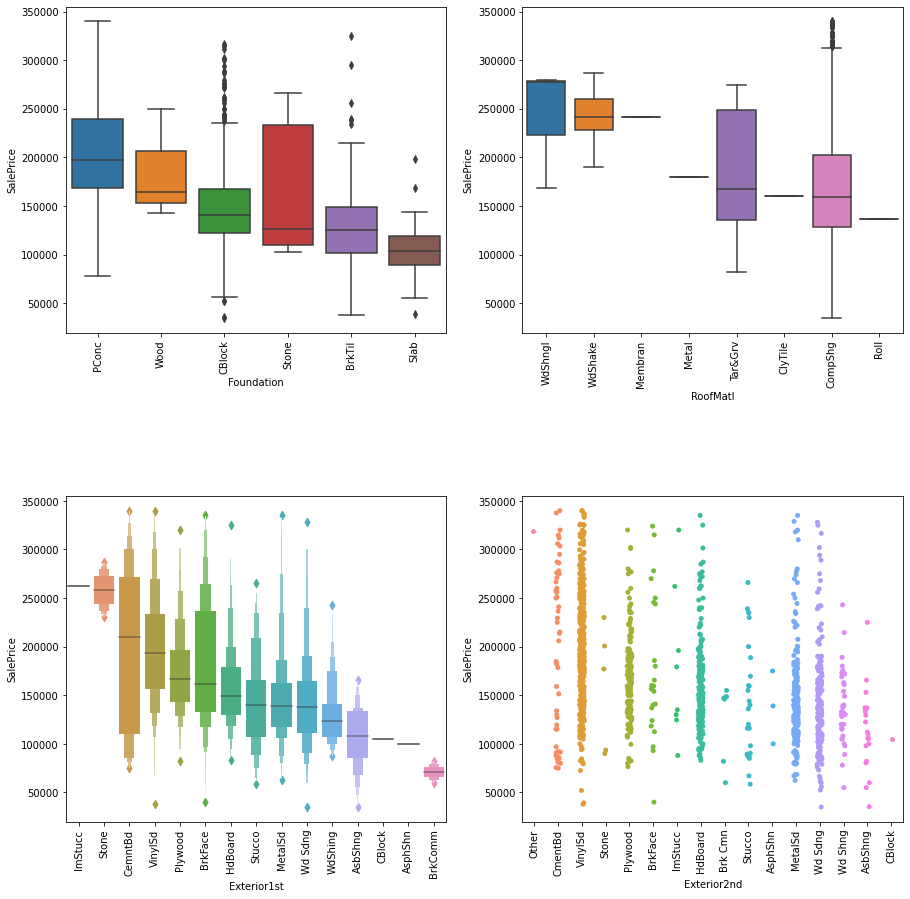

In [0]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
table = salesTrain.groupby(['Foundation'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='Foundation',y="SalePrice",order=table['Foundation'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,2)
table = salesTrain.groupby(['RoofMatl'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='RoofMatl',y="SalePrice",order=table['RoofMatl'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,3)
table = salesTrain.groupby(['Exterior1st'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='Exterior1st',y="SalePrice",order=table['Exterior1st'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,2,4)
table = salesTrain.groupby(['Exterior2nd'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=salesTrain,x='Exterior2nd',y="SalePrice",order=table['Exterior2nd'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig = px.histogram(salesTrain, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(salesTrain, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

In [0]:
# Exterior 1st :- We can see a difference in Sale Price in exterior covering of the house .
# Imitation Stucco,Stone,Cement Board coverings have high value in determining sale price ,while the lowest value is for common brick covering, dropped while Cement board and Vinyl Siding are having almost same price.

# Exterior2nd :- Having multiple materials changes the price of the house.Stone value has dropped while Cement board and Vinyl Siding are having almost same price.
# Roof Styles :- Most of the house are having Gable and Hip roof styles and average sale price of 1.5lakhs.
# Roof Styles :- Most of the house are having Gable and Hip roof styles and average sale price of 1.5lakhs.

In [0]:
table = salesTrain_new.groupby(['RoofStyle'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

,RoofStyle,SalePrice
5,Shed,225000
0,Flat,185000
4,Mansard,175000
3,Hip,161000
1,Gable,158000
2,Gambrel,139000


In [0]:
# Mason Veneer Types :- Most of the properties are not having Masonry veneer walls and have low sale price. Properties having masonry walls of Stone and Bricks have high value with Stone being highest.

In [0]:
table = salesTrain_new.groupby(['MasVnrType'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Greys')

,MasVnrType,SalePrice
3,Stone,227680.000000
1,BrkFace,179000.000000
2,None,142312.500000
0,BrkCmn,139000.000000


In [0]:
# Foundation :- Houses with poured concrete foundation have highest sale price followed by wooden and concrete block.
# Slab foundation having the lowest value.
# Roof Material :- Almost all the properties in our data have standard shingle roof material with average sale price of 1,60,000.
# The highest average value is for wooden shingles materials and the lowest for roll roof materials.

In [0]:
############## Category 6 :: Exterior Condition and Quality ###################

In [0]:
# ExterQual: Evaluates the quality of the material on the exterior
# ExterCond: Evaluates the present condition of the material on the exterior

In [0]:
cat6=['ExterQual', 'ExterCond']

In [0]:
fig = plt.hist(salesTrain, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = plt.hist(salesTrain, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

TypeError: ignored

In [0]:
# Exterior Quality :- If the exterior quality is good or excellent , The price will be more .Most of the properties have average exterior quality and very few have excellent exterior quality.
# Exterior Condition :- Average,good and excellent exterior condition properties will have higher sale price.And here also most of the properties have average exterior condition and only 3 properties in our dataset have excellent exterior condition.

In [0]:
##################### Category 7 :: Basements ###################

In [0]:
# BsmtQual: Evaluates the height of the basement
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinType2: Rating of basement finished area (if multiple types)

In [0]:
cat7=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [0]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=salesTrain['SalePrice'],x=salesTrain['BsmtQual'],name='Basement Quality'),row=1,col=1)
fig.add_trace(go.Box(y=salesTrain['SalePrice'],x=salesTrain['BsmtExposure'],name='Basement Exposure'),row=1,col=2)
fig.update_layout( title_text="Basement Quality and Exposure",height=400)
fig.show()

fig = px.histogram(salesTrain, x="SalePrice", color='BsmtCond',barmode="overlay",height=400,title='Basement Condition')
fig.show()

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=salesTrain['SalePrice'],x=salesTrain['BsmtFinType1'],name='Basement_Finish Type1 '),row=1,col=1)
fig.add_trace(go.Violin(y=salesTrain['SalePrice'],x=salesTrain['BsmtFinType2'],name='Basement_Finish Type2'),row=1,col=2)
fig.update_layout( title_text="Basement Finish Type 1 and 2",height=400)
fig.show()

NameError: ignored

In [0]:
# Basement Quality :- Here the Basement quality refers to height of the basement.So excellent means more than 100 inches and poor means less than 70 inches.
# So Properties with excellent and good basement quality will have higher sale price.
# Basement Exposure :- Basements with good exposure to garden or walkouts have higher sale price and properties with no basements or the ones which are not known have low sale price.
# Both of the above features help us in predicting Sale Price as we can see variation in Sale Price.
# Basement Condition :- Average and Good condition have higher sale price as seen in other cases.
# Basment finish type 1 and 2 :- Good and Average living quarters and unfinished basements have higher average sale price in both type 1 and type 2 and below average finishes will obviously have less value.


In [0]:
############################### Category 8 :: Heating and Air Conditioning ######################

In [0]:
cat8=['Heating', 'HeatingQC', 'CentralAir','Electrical']

In [0]:
# Heating: Type of heating
#HeatingQC: Heating quality and condition
#CentralAir: Central air conditioning
#Electrical: Electrical system

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  from ipykernel import kernelapp as app


NameError: ignored

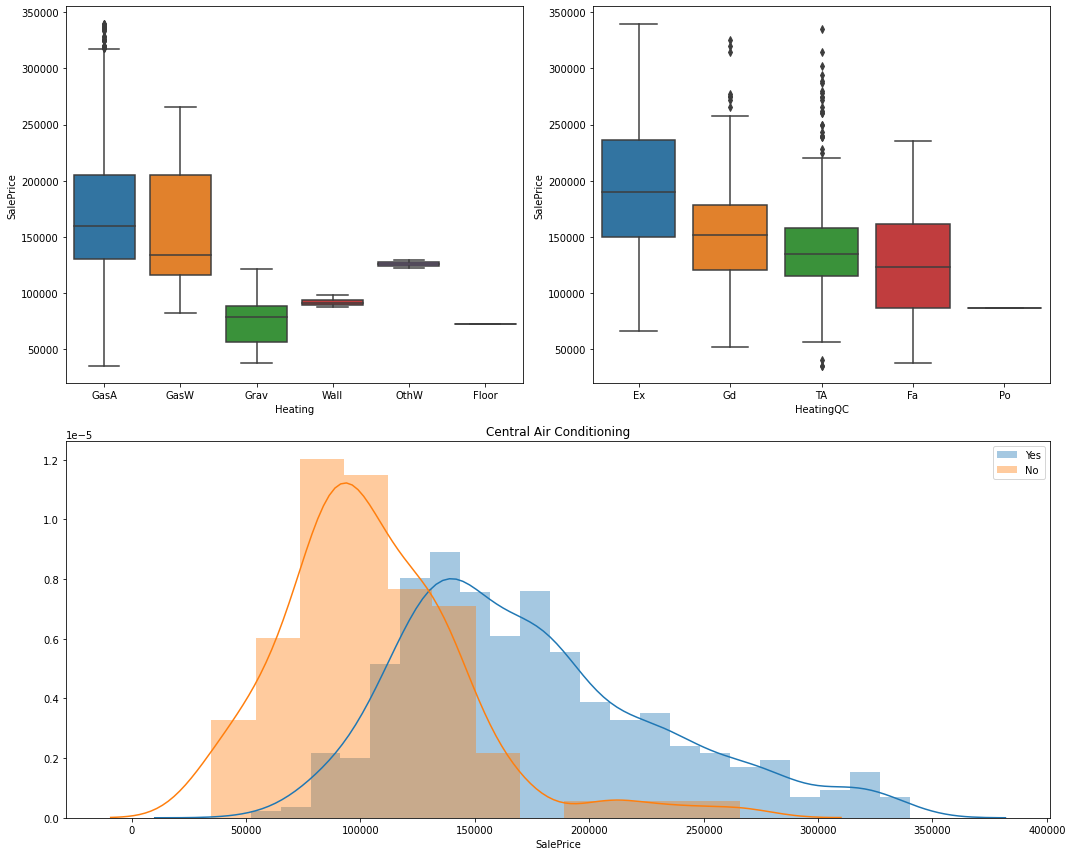

In [0]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True,figsize=(15,12))
gs = gridspec.GridSpec(2, 2)

plt.subplot(gs[0,0])
ax1 = sns.boxplot(data=salesTrain,x="Heating",y="SalePrice")

plt.subplot(gs[0,1])
ax1 = sns.boxplot(data=salesTrain,x="HeatingQC",y="SalePrice")

plt.subplot(gs[1,:])
sns.distplot(salesTrain[salesTrain['CentralAir']=='Y']['SalePrice'])
sns.distplot(salesTrain[salesTrain['CentralAir']=='N']['SalePrice'])
plt.legend('upper right' , labels = ['Yes','No'])
plt.xlabel("SalePrice")
plt.title("Central Air Conditioning")

px.histogram(salesTrain, x="SalePrice", color='Electrical',barmode="overlay",title="Electrical System")

In [0]:
# Electrical :- Most of the properties have standard circuit breakers and having highest average sale price of 170000.
# Properties with Poor fuse box system and mixed system have less than 10000 sale price.
# Heating Quality :- It can be clearly seen in the box plot and no need of explanation.
# Heating :- Heating in the wall or hot water / steam is associated with very low house prices. Gas formed warm air appears to drive a higher sales price.
# Central AC :- It's straightforward ,the properties which have Air conditioning will have higher price than the ones which dont hav

In [0]:
################## Category 9 :: Internal Quality #####################

In [0]:
# KitchenQual: Kitchen quality
# Functional: Home functionality (Assume typical unless deductions are warranted)
# FireplaceQu: Fireplace quality

In [0]:
cat9=['KitchenQual', 'Functional','FireplaceQu']


In [0]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Violin(y=salesTrain['SalePrice'],x=salesTrain['FireplaceQu'],name='Fireplace Quality'),row=1,col=1)
fig.add_trace(go.Box(y=salesTrain['SalePrice'],x=salesTrain['KitchenQual'],name='Kitchen Quality'),row=1,col=2)
fig.update_layout( showlegend=True,title_text="Fireplace and Kitchen Quality")
fig.show()

fig = px.histogram(salesTrain, x="SalePrice", color='Functional',barmode="overlay",title="Functional")
fig.show()

NameError: ignored

In [0]:
# No need to study about kitchen and fireplace quality
# Typical functionality having highest value for sale price and as functionality decreases , sale price also decreases.
# Functional :- Functional feature tells us about the home functionality.So we can see that typical functionality is seen in most of the properties in our dataset.

In [0]:
################## Category 10 :: Garage ###########

In [0]:
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageQual: Garage quality
# GarageCond: Garage condition

In [0]:
#Category 8:- Garage
cat8=['GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


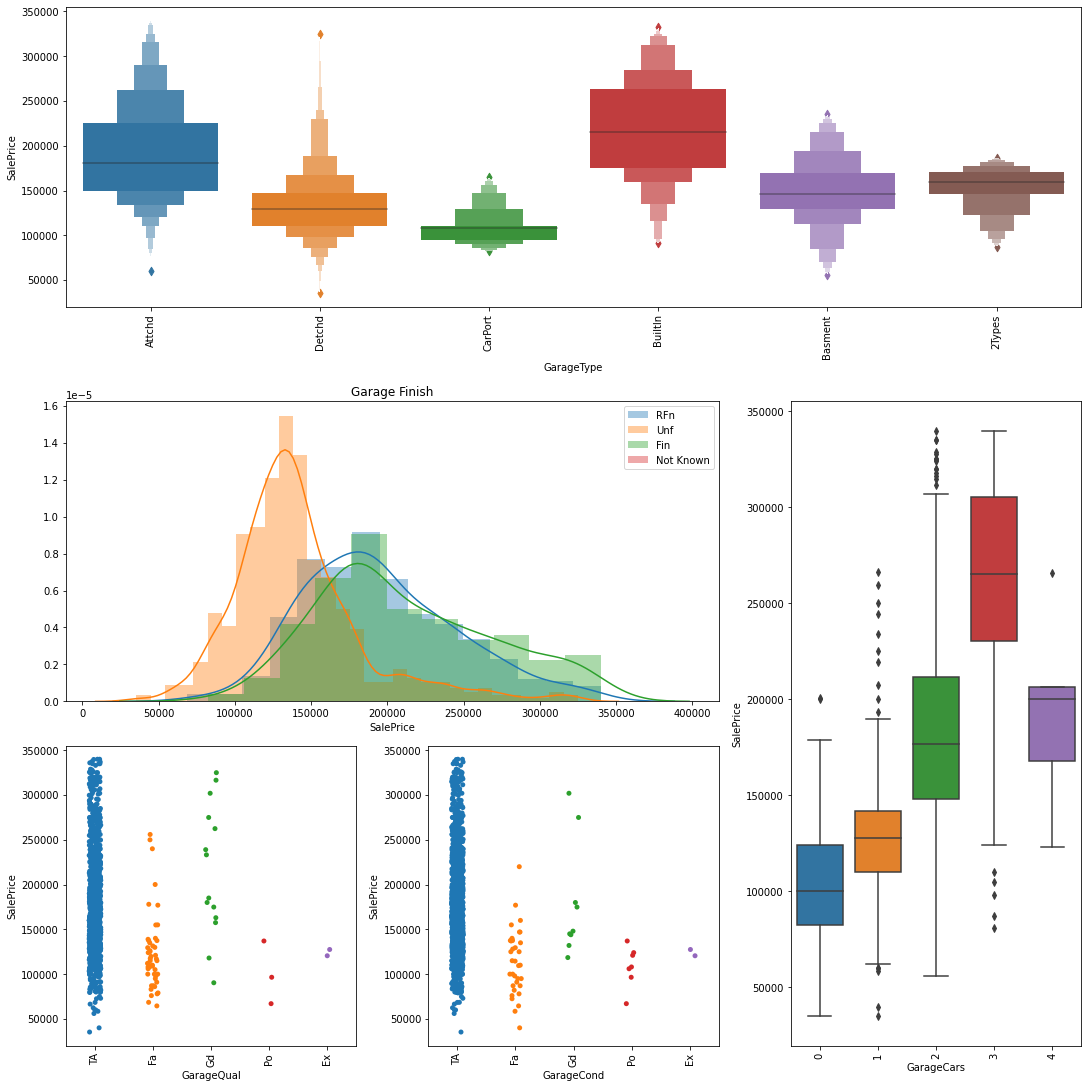

In [0]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=salesTrain,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(salesTrain[salesTrain['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(salesTrain[salesTrain['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(salesTrain[salesTrain['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(salesTrain[salesTrain['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=salesTrain,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=salesTrain,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=salesTrain,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);


In [0]:
# Now we are looking at the garage in our properties.
# Garage Type :- Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest price.
# Garage Finish :- Finished and roughly finished garages account for higher sale price than unfinished ones.And the properties which dont have a garage have the lowest price.
# GarageCars :- Here garage cars refers to size of garage in car capacity.So higher the number more the Sale Price.

In [0]:
#################### Category 11 :: Outdoors ##################

In [0]:
cat9=['PavedDrive']

In [0]:
# PavedDrive: Paved driveway

In [0]:
px.hist(salesTrain, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

NameError: ignored

In [0]:
# Paved Driveway :- Most of the houses have Paved driveway in our dataset and these properties have highest sale price than partial and dirt/gravel driveways.

In [0]:
################# Category 12 :: Sale Type and Condition ###############

In [0]:
# SaleType: Type of sale
# SaleCondition: Condition of sale

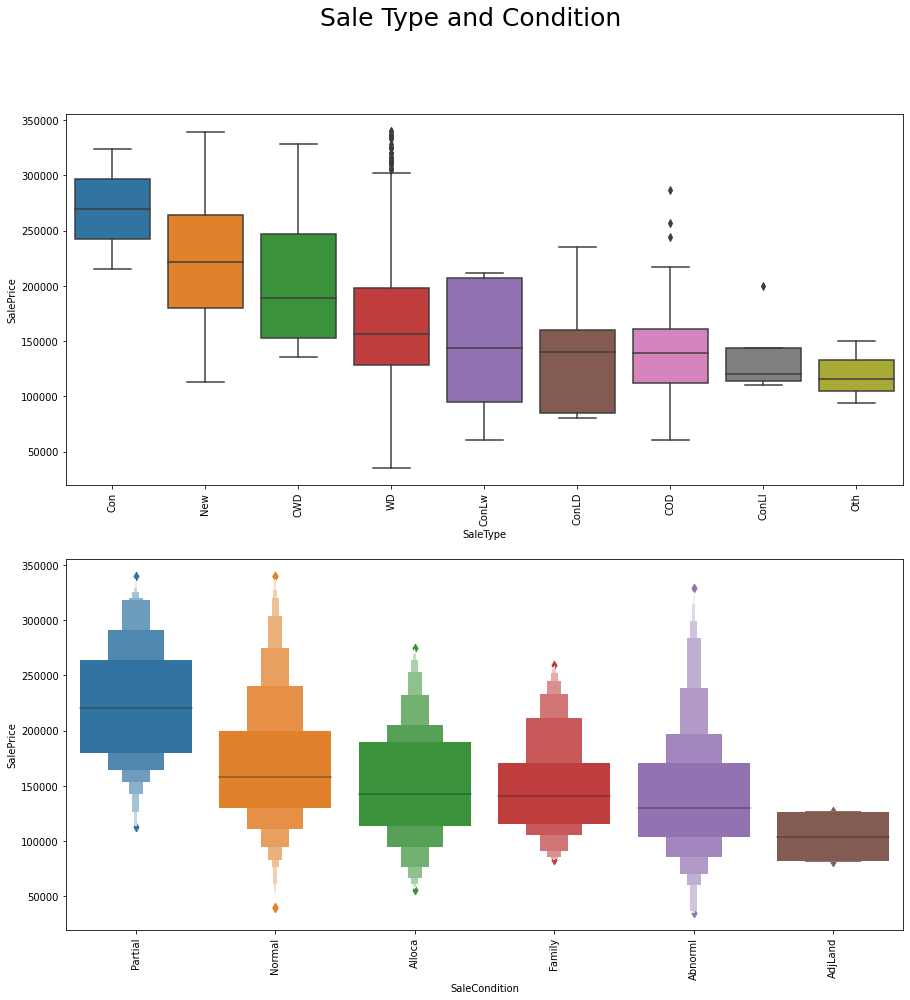

In [0]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = salesTrain.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=salesTrain,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = salesTrain.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=salesTrain,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

In [0]:
# Both the variables above exhibit variation in sales price across the levels.
# Sale Type :- Most of the properties are on warranty deed sale.The manor in which the house is sold appears to have different price ranges.
# Sale Condition :- If the house to be sold is in partial or normal condition , the price will definitely be higher than the rest of the conditions.

In [0]:
### Based on the analysis of the above categorical features , we can conclude that the following features are important in predicting Sale Price

# MSSubClass and MSZoning.
# All the Quality features , as the houses with average ,good,excellent quality features will have higher Sale Price.
# Fireplaces and Garage Cars, more the number , higher the Sale Price.
# We also saw variation in Basement Exposure.
# And lastly Sale Type and Sale condition are also one of the important features..

In [0]:
########################## Datetime Features ##################

In [0]:
# We have four year features in our dataset.
# 1.YearBuilt
# 2.YearRemodAdd
# 3.GarageYrBlt
# 4.YrSold
#We will analyze these features with Sale Price and try to gather some information.

In [0]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

In [0]:
# Line plot that tells us the variation of each year with Sale Price.

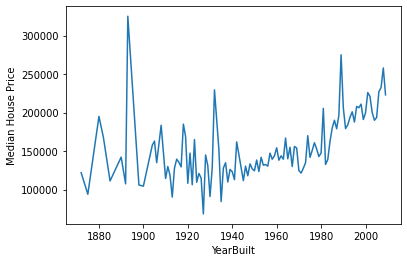

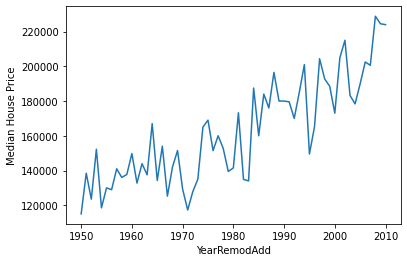

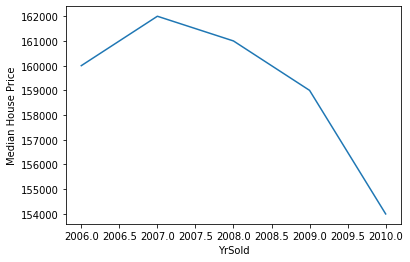

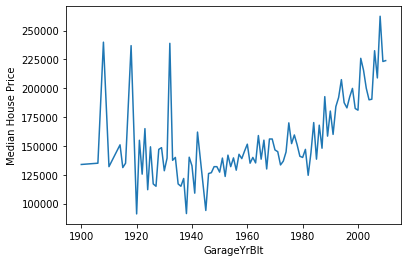

In [0]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = salesTrain.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

In [0]:
# We can see that the houses and garage which were built and remoddeled during 90s have less Sale Price than the newer ones.
# With every year , House price increases.
# But if see ,Year Sold feature the Price falls down with each year which is strange.
# Let's do some further analysis on these features.
# Due to the strange behaviour in Year Sold , we subtract each feature with Year Sold.
# i.e We are subtracting the year when the house was built with the year it was sold and comparing it with the Sale price.

In [0]:
data=salesTrain.copy()
data['Sold-Built'] = data['YrSold'] - data['YearBuilt']
fig=px.scatter(data,x="Sold-Built",y="SalePrice",width=700)
fig.show()

data=salesTrain.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=salesTrain.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()

NameError: ignored

In [0]:
#Feature engineering

In [0]:
#Analyse the target variable (Univariate Analysis)

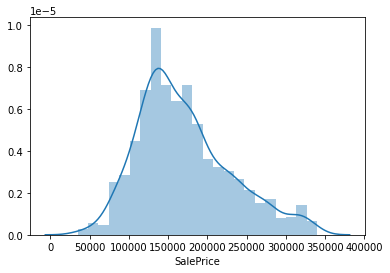

In [0]:
sns.distplot(salesTrain['SalePrice']);

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
#dimension of train data
train.shape

(1460, 81)

In [0]:
#dimension of test data
test.shape

(1459, 80)

In [0]:
#skewness
print("Skewness: %f" % train['SalePrice'].skew())

Skewness: 1.882876


In [0]:
#To remove the skewness we use the log function
SalePriceLog = np.log(train['SalePrice'])
SalePriceLog.skew()

0.12133506220520406

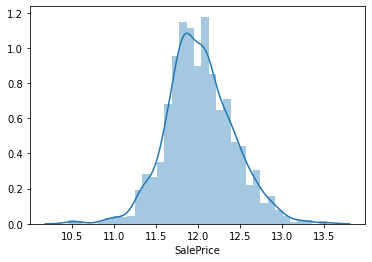

In [0]:
#Plot after adjusted skewness
sns.distplot(SalePriceLog);

In [0]:
SalePrice = SalePriceLog

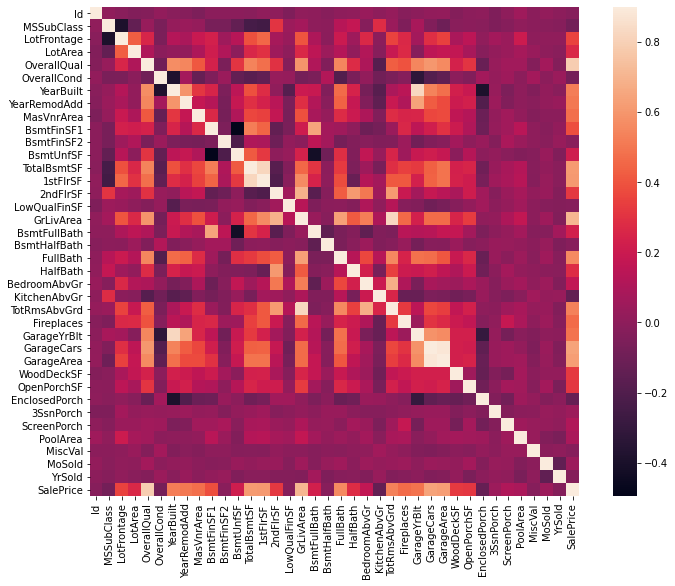

In [0]:

#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

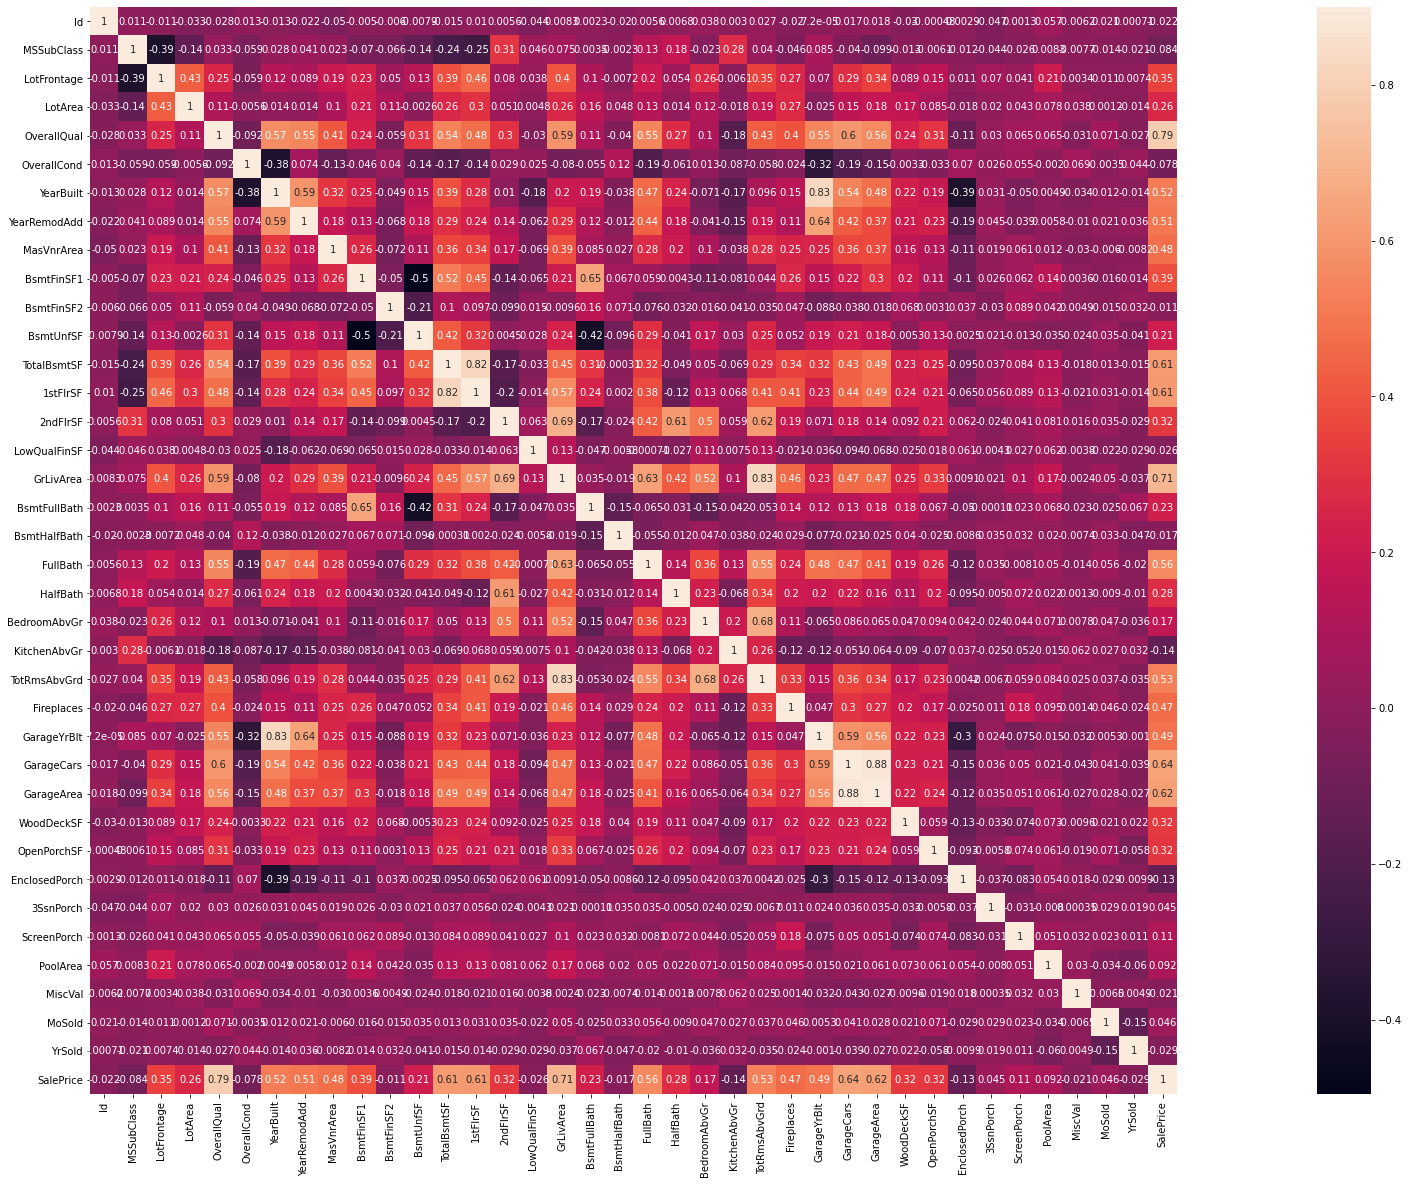

In [0]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(50,20))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [0]:
Num=corrmat['SalePrice'].sort_values(ascending=False).head(10).to_frame()

Num

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [0]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [0]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([total], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


Text(0.5, 1.0, 'Percent missing data by feature')

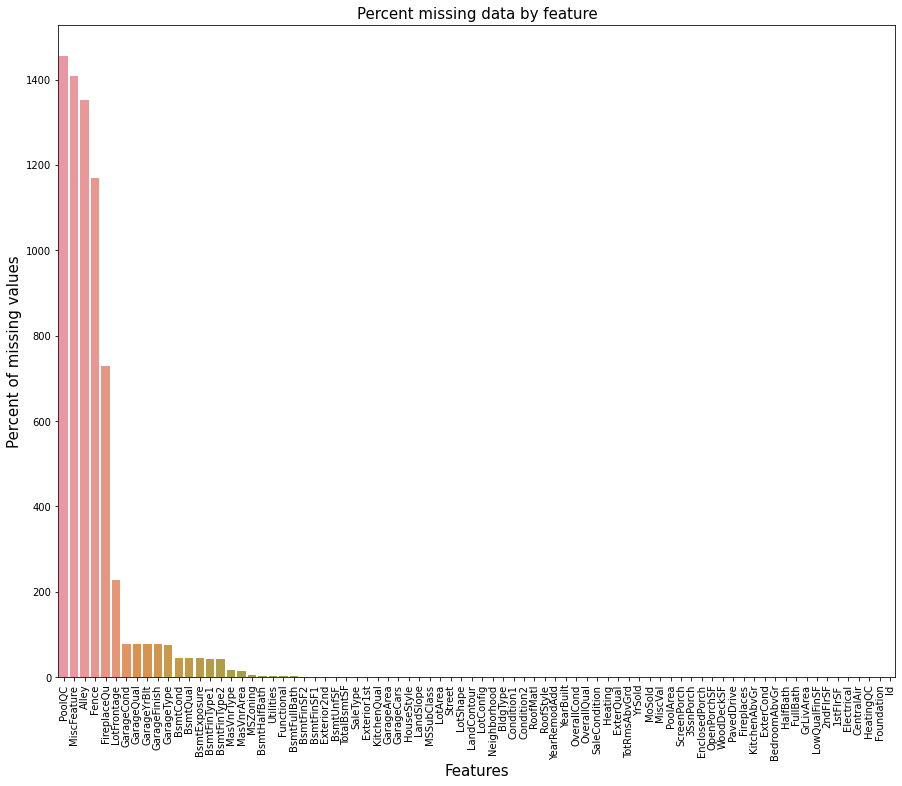

In [0]:
#visulize missing value using sns plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [0]:
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType'], axis=1 ,inplace=True)

In [0]:
# missing value treatment for continuous variable
for col in ('LotFrontage','GarageYrBlt','GarageCars','BsmtFinSF1','TotalBsmtSF','GarageArea','BsmtFinSF2','BsmtUnfSF','LotFrontage','GarageYrBlt','BsmtFullBath','BsmtHalfBath'):
    train[col]=train[col].fillna(train[col].mean())
    test[col]=test[col].fillna(test[col].mean())

In [0]:
# missing value treatment for categorical variable
for col in ('BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical','Exterior2nd','Exterior1st','KitchenQual','Functional','SaleType','Utilities','MSZoning','BsmtQual','BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrArea', 'Electrical'):
    test[col]=test[col].fillna(test[col].mode()[0])
    train[col]=train[col].fillna(train[col].mode()[0])

In [0]:
# checking if is there any missing variable left
train.isnull().sum().max()

0

In [0]:
# checking if is there any missing variable left
test.isnull().sum().max()

0

In [0]:
list_of_numerics=train.select_dtypes(include=['float','int']).columns
types= train.dtypes

outliers= train.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))


explo = pd.DataFrame({'Types': types,
                      'Outliers': outliers}).sort_values(by=['Types'],ascending=False)
explo.transpose()

,ExterQual,BsmtCond,Exterior1st,Exterior2nd,KitchenQual,ExterCond,Foundation,BsmtQual,BsmtExposure,Functional,BsmtFinType1,BsmtFinType2,PavedDrive,Heating,HeatingQC,CentralAir,RoofMatl,RoofStyle,LotConfig,Neighborhood,MSZoning,SaleCondition,Street,LotShape,LandContour,Utilities,LandSlope,Electrical,Condition1,Condition2,BldgType,HouseStyle,SaleType,GarageYrBlt,MasVnrArea,LotFrontage,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fireplaces,Id,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotRmsAbvGrd,BsmtUnfSF,KitchenAbvGr,BedroomAbvGr,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,MSSubClass,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,SalePrice
Types,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,98,106,5,21,32,77,5,0,208,24,116,7,52,0,0,30,29,68,35,69,2,125,7,0,7,167,103,61,20,2,26,31,1,82,0,0,61


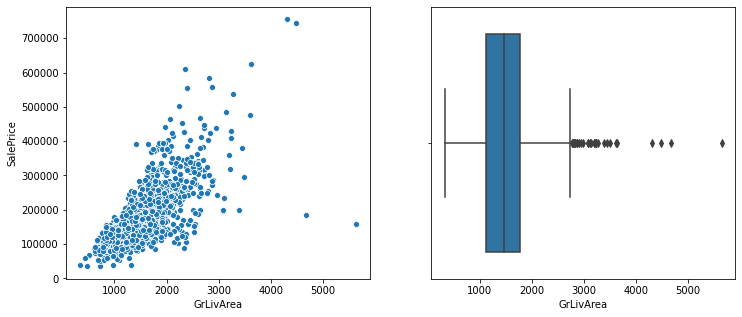

In [0]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

ax1= sns.scatterplot(x='GrLivArea', y='SalePrice', data= train,ax=axes[0])
ax2= sns.boxplot(x='GrLivArea', data= train,ax=axes[1])

In [0]:
#removing outliers recomended by author
train= train[train['GrLivArea']<4000]
#test= test[test['GrLivArea']<4000]

In [0]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)

In [0]:
categorial_features_train = train.select_dtypes(include=[np.object])
categorial_features_train.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Y,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Y,2007,WD,Normal


In [0]:
categorial_features_test = test.select_dtypes(include=[np.object])
categorial_features_test.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,YrSold,SaleType,SaleCondition
0,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,2010,WD,Normal
1,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,2010,WD,Normal


In [0]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_train:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column]) 

In [0]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

label_encoders = {}
for column in categorial_features_test:
    label_encoders[column] = LabelEncoder()
    test[column] = label_encoders[column].fit_transform(test[column]) 

In [0]:
# dividing into dependent and independent variable data set
xtrain = train.drop('SalePrice', axis = 1)
ytrain = train['SalePrice']

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb

In [0]:
#Linear Regression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# score the model
model1.score(xtrain,ytrain)

0.8998795031894831

In [0]:
#Gradient Boosting
model2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model2.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
model2.score(xtrain,ytrain)

0.9906745236620275

In [0]:


model3 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



In [0]:
#XG Boost
model3.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [0]:
model3.score(xtrain, ytrain)

0.9980329342046588

In [0]:
#Prediction on test data of different model
pred_1=model1.predict(test)
pred_2=model2.predict(test)
pred_3=model3.predict(test)

In [0]:
#we take an average of predictions from all the models and use it to make the final prediction
final_pred = (pred_1+pred_2+pred_3)/3

In [0]:
final_pred

array([125161.00131379, 165750.43744078, 190184.38904598, ...,
       166195.33125956, 118862.69864521, 226756.43189829])

In [0]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [0]:
sample_sub['SalePrice'] = final_pred
sample_sub.to_csv('final_submission1.csv', index=False)